# **Compito Esercitazione 3**

* Import and Image Loading E3
* **Sharpening (intro, implementazione)**
* Relazione
* Plus

# Import and Image Loading E3

In [1]:
import numpy as np

# Gestione immagini
from skimage import io # Per input/output
from skimage import transform # Per trasformazioni geometriche (es. resize)
from skimage import filters # Per filtri locali
from skimage import color # Per cambi colore

# Visualizzazione e interazione
from matplotlib import pyplot as plt
import ipywidgets as widgets

In [2]:
# Imposta le dimensioni di visualizzazione nel notebook
plt.rcParams['figure.figsize'] = [15,5] # width, height

In [3]:
pic_color = io.imread('images/garzoni.jpeg', as_gray=False)
pic_gray = io.imread('images/garzoni.jpeg', as_gray=True)
pic_gray.shape
pic_color.shape

(738, 900, 3)

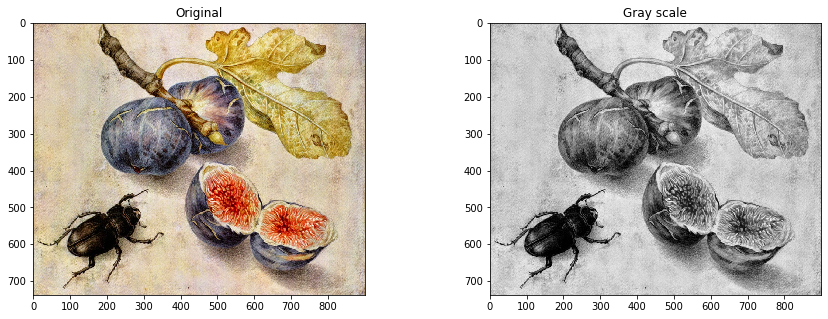

In [4]:
plt.subplot(1,2,1); plt.imshow(pic_color); plt.title('Original')
plt.subplot(1,2,2); plt.imshow(pic_gray, cmap='gray'); plt.title('Gray scale')
plt.show()

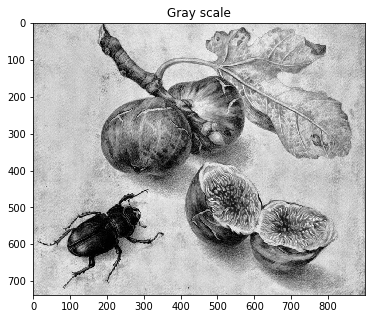

In [5]:
plt.imshow(pic_gray, cmap='gray'); plt.title('Gray scale')
plt.show()

# Sharpening

## Intro

Lo sharpening ("affilamento") è l'operazione inversa allo smoothing ("lisciamento"), che appiana i dettagli tipicamente mediando l'intensità luminosa fra pixel adiacenti con operazioni di medie ponderate. 
Dunque lo sharpening esalta i dettagli da immagini precedentemente "lisciate", sfuocate, o si applica a prescindere dalla corruzione subita dall'immagine che consideriamo originale.
In particolare, un metodo di sharpening è quello che fa uso di unsharpening mask: l'immagine originale viene appositamente corrotta, in modo da poter calcolare una differenza tra originale e sfuocata. Questa differenza è l'unsharpening mask vera e propria, che traccia gli effetti della sfocatura, salvando i dettagli che la sfocatura elimina. 
Sommandola all'immagine originale, si compie un'operazione equivalente a cercare di togliere un'ulteriore sfocatura, ossia di esaltare i dettagli oltre il livello di partenza.
Esempio:

* Filtraggio gaussiano per sfocare l'immagine (eliminare i dettagli)
* Differenza tra originale e filtrata per isolare i dettagli
* Somma dei dettagli all'originale per esaltarli

## Implementazione

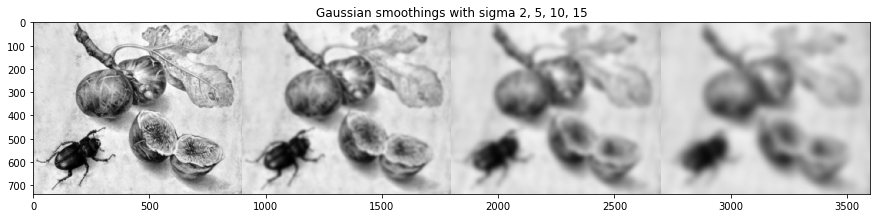

In [6]:
# filtro gaussiano

sds = [(2, 2), (5, 5), (10, 10), (15, 15)] # stdev della gaussiana 2D
pics_filtered  = [filters.gaussian(pic_gray, sigma=sd) for sd in sds]

mosaic = np.concatenate((pics_filtered[0],pics_filtered[1],pics_filtered[2],pics_filtered[3]),axis=1)
plt.imshow(mosaic, cmap='gray'); plt.title('Gaussian smoothings with sigma 2, 5, 10, 15'); plt.show()

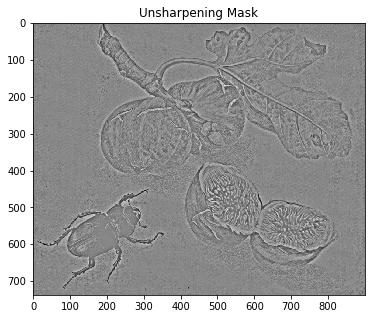

In [7]:
# differenza, unsharp mask

unsmask5 = pic_gray - pics_filtered[1]

plt.imshow(unsmask5, cmap='gray'); plt.title('Unsharpening Mask')
plt.show()

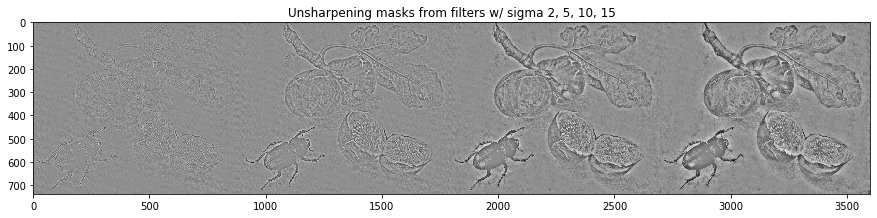

In [8]:
masks  = [pic_gray - smoothed for smoothed in pics_filtered]

moskaic = np.concatenate((masks[0],masks[1],masks[2],masks[3]),axis=1)
plt.imshow(moskaic, cmap='gray'); plt.title('Unsharpening masks from filters w/ sigma 2, 5, 10, 15'); plt.show()

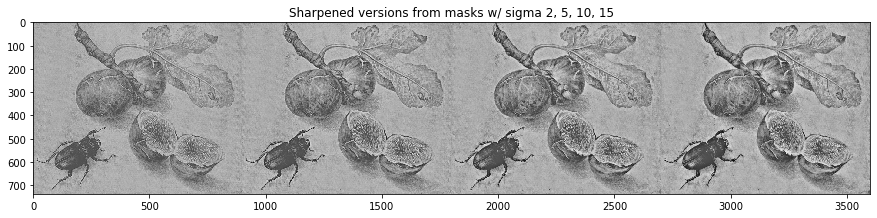

In [9]:
# somma fra originale e masks

pics_sharpened = [pic_gray + mask for mask in masks]

detailings = np.concatenate((pics_sharpened[0],pics_sharpened[1],pics_sharpened[2],pics_sharpened[3]),axis=1)
plt.imshow(detailings, cmap='gray'); plt.title('Sharpened versions from masks w/ sigma 2, 5, 10, 15'); plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

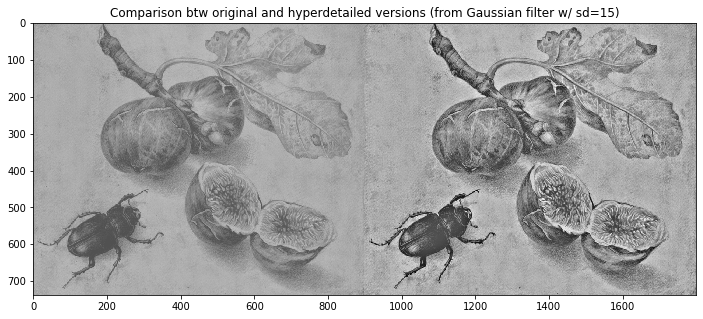

In [10]:
comparison = np.concatenate((pic_gray, pics_sharpened[3]), axis=1)
plt.imshow(comparison, cmap='gray')
plt.title('Comparison btw original and hyperdetailed versions (from Gaussian filter w/ sd=15)'); plt.show

<function matplotlib.pyplot.show(*args, **kw)>

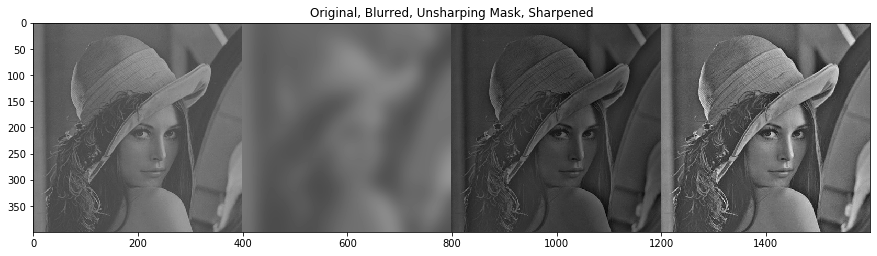

In [11]:
lena_gray = io.imread('images/lena.jpg', as_gray=True)
lena_blur = filters.gaussian(lena_gray, sigma=sds[3])
lena_unsmask = lena_gray - lena_blur
lena_sharp = lena_gray + lena_unsmask

seq = np.concatenate((lena_gray, lena_blur, lena_unsmask, lena_sharp), axis=1)
plt.imshow(seq, cmap='gray')
plt.title('Original, Blurred, Unsharping Mask, Sharpened'); plt.show

# Relazione

L'effetto dello sharpening è tanto maggiore quanto maggiore era la deviazione standard dei filtri gaussiani utilizzati per sfocare l'immagine. Infatti, maggiore la corruzione dell'immagine, maggiore l'intensità dell'unsharpening mask.

# Bonus

In questa sezione si trasforma l'immagine in formato YCbCr per aggiungere la mask (che non fa riferimento ad un canale colore) al canale di luminanza.
L'esperimento è solamente indicativo, l'operazione non è formalmente corretta ma il risultato è comunque interessante.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<function matplotlib.pyplot.show(*args, **kw)>

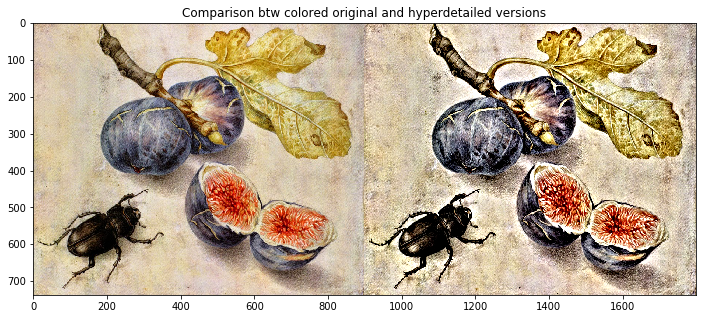

In [12]:
pic_color_ycbcr = color.rgb2ycbcr(pic_color[:,:,0:3])
detailed_y = pic_color_ycbcr[:,:,0] + masks[3]*255.0

detailed_color = np.concatenate((detailed_y[...,None], pic_color_ycbcr[:,:,1][...,None], pic_color_ycbcr[:,:,2][...,None]), axis=2)

comparison2 = np.concatenate((color.ycbcr2rgb(pic_color_ycbcr), color.ycbcr2rgb(detailed_color)), axis=1)
plt.imshow(comparison2); plt.title('Comparison btw colored original and hyperdetailed versions'); plt.show

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<function matplotlib.pyplot.show(*args, **kw)>

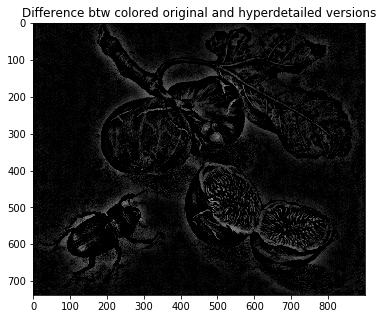

In [13]:
diff = color.ycbcr2rgb(detailed_color) - color.ycbcr2rgb(pic_color_ycbcr)
plt.imshow(diff); plt.title('Difference btw colored original and hyperdetailed versions'); plt.show

La "mask" ricavata è diversa da quella effettivamente applicata, proprio per la non equivalenza fra le grandezze nei canali e la non linearità delle operazioni. Nondimeno l'effetto è quello di esaltare i dettagli.